# Figure 7 - Cell-type-specific behavior maps

Create (DC x amplitude) behavior maps of RS and LTS neurons at various pulse repetition frequencies, along with characteristic Q-V traces, from SONIC model predictions.

### Matplotlib parameters

In [1]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = 'arial'

### Imports

In [2]:
import logging
import numpy as np
import matplotlib.pyplot as plt
from PySONIC.utils import logger
from PySONIC.neurons import getPointNeuron
from utils import saveFigsAsPDF, plotMapAndTraces, cm2inch

Set high logging level to avoid extra logging

In [3]:
logger.setLevel(logging.ERROR)

### Input directory

Indicate here the directory that contains the SONIC behavior maps simulation files (*maps* sub-folder)

In [4]:
inputdir = input('Select input directory: ')

Select input directory:  C:\Users\lemaire\Documents\SONIC paper data new\maps


### Plot parameters

In [5]:
figindex = 7
pltargs = {
    'map_figsize': cm2inch(16, 11.6),
    'trace_figsize': cm2inch(14, 6),
    'fs': 14,
    'FRbounds': (1e0, 1e3),  # Hz
    'tbounds': (0, 240e-3),  # s
    'Vbounds': (-150, 50),  # mV
    'thresholds': True
}
figs = {}

### Simulation parameters

In [6]:
a = 32e-9       # m
Fdrive = 500e3  # Hz
tstim = 1.0     # s
toffset = 1.0   # s
cov = 1.0
amps = np.logspace(np.log10(10), np.log10(600), num=30) * 1e3  # Pa
DCs = np.arange(1, 101) * 1e-2

## 10 Hz PRF

In [7]:
subindex = 'a'
PRF = 1e1  # Hz

### RS neuron

C:\Users\lemaire\Anaconda3\lib\site-packages\matplotlib\colors.py:1028: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


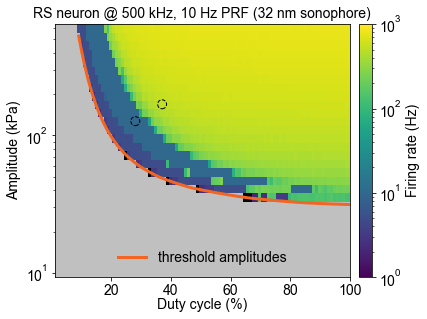

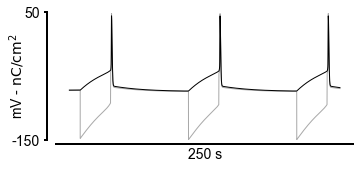

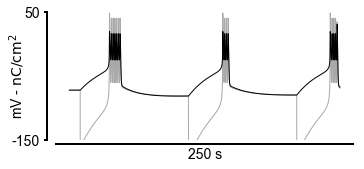

In [8]:
pneuron = getPointNeuron('RS')
insets = [(.28, 126.96e3), (.37, 168.39e3)]
out = plotMapAndTraces(
    inputdir, pneuron, a, Fdrive, tstim, toffset, amps, PRF, DCs, cov, insets=insets, **pltargs)
figs.update({f'{subindex}_{k}': v for k, v in out.items()})

### LTS neuron

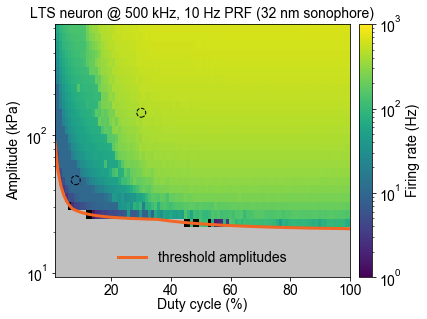

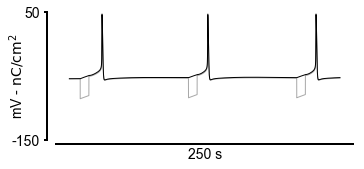

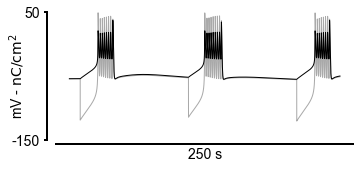

In [9]:
pneuron = getPointNeuron('LTS')
insets = [(.08, 47.26e3), (.30, 146.22e3)]
out = plotMapAndTraces(
    inputdir, pneuron, a, Fdrive, tstim, toffset, amps, PRF, DCs, cov, insets=insets, **pltargs)
figs.update({f'{subindex}_{k}': v for k, v in out.items()})

## 100 Hz PRF

In [10]:
subindex = 'b'
PRF = 1e2  # Hz

### RS neuron

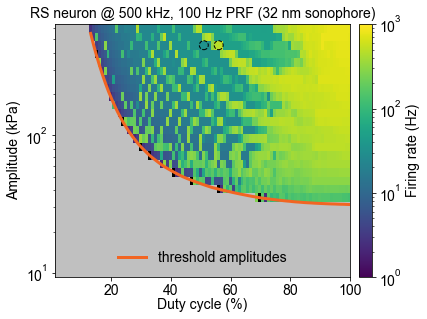

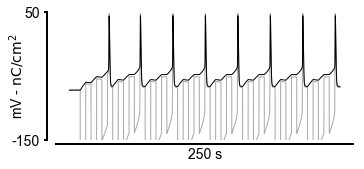

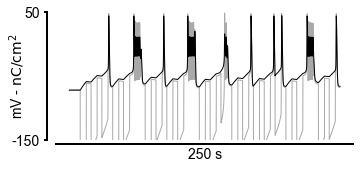

In [11]:
pneuron = getPointNeuron('RS')
insets = [(.51, 452.40e3), (.56, 452.40e3)]
out = plotMapAndTraces(
    inputdir, pneuron, a, Fdrive, tstim, toffset, amps, PRF, DCs, cov, insets=insets, **pltargs)
figs.update({f'{subindex}_{k}': v for k, v in out.items()})

### LTS neuron

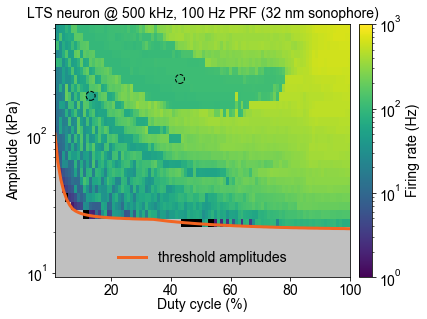

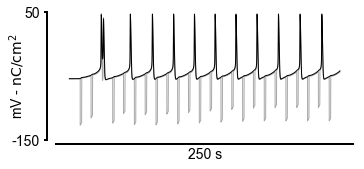

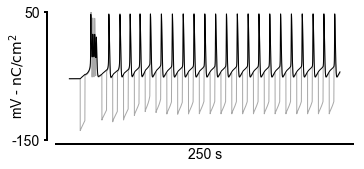

In [12]:
pneuron = getPointNeuron('LTS')
insets = [(.13, 193.92e3), (.43, 257.19e3)]
out = plotMapAndTraces(
    inputdir, pneuron, a, Fdrive, tstim, toffset, amps, PRF, DCs, cov, insets=insets, **pltargs)
figs.update({f'{subindex}_{k}': v for k, v in out.items()})

## 1 kHz PRF

In [13]:
subindex = 'c'
PRF = 1e3  # Hz

### RS neuron

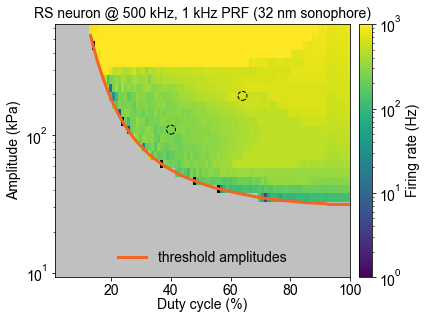

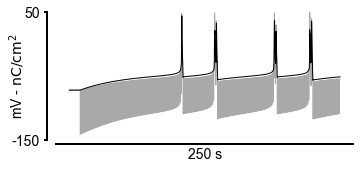

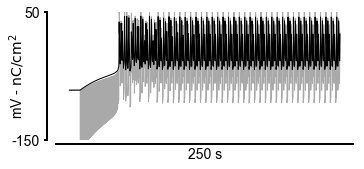

In [14]:
pneuron = getPointNeuron('RS')
insets = [(.40, 110.25e3), (.64, 193.92e3)]
out = plotMapAndTraces(
    inputdir, pneuron, a, Fdrive, tstim, toffset, amps, PRF, DCs, cov, insets=insets, **pltargs)
figs.update({f'{subindex}_{k}': v for k, v in out.items()})

### LTS neuron

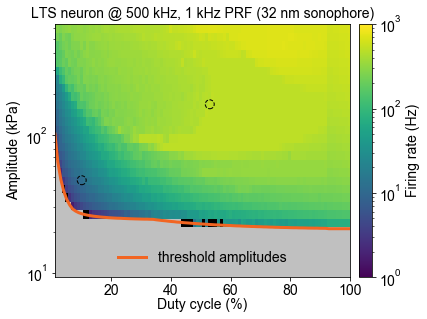

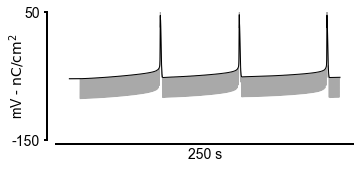

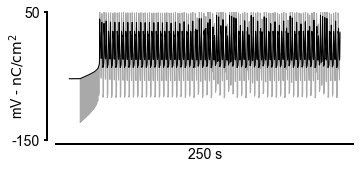

In [15]:
pneuron = getPointNeuron('LTS')
insets = [(.10, 47.26e3), (.53, 168.39e3)]
out = plotMapAndTraces(
    inputdir, pneuron, a, Fdrive, tstim, toffset, amps, PRF, DCs, cov, insets=insets, **pltargs)
figs.update({f'{subindex}_{k}': v for k, v in out.items()})

### Save figure panels

Save figure panels as **pdf** in the *figs* sub-folder:

In [16]:
saveFigsAsPDF(figs, figindex)